<a href="https://colab.research.google.com/github/Okayu-d/webscreping/blob/master/KomonjoNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Github から  クローン
!git clone --depth 1 https://github.com/rois-codh/kmnist.git
# cloneしたものからインストール
!python /content/kmnist/download_data.py
# インストールしたものを開く
!tar -xvf kkanji.tar

ストリーミング出力は最後の 5000 行に切り捨てられました。
kkanji2/U+548C/e480b51e12efb2e4.png
kkanji2/U+548C/239234ede6a73150.png
kkanji2/U+548C/698841df7f8323f7.png
kkanji2/U+548C/cf585c7085ab59b3.png
kkanji2/U+548C/a8b94ee740933578.png
kkanji2/U+548C/d57169766c18c5fe.png
kkanji2/U+548C/c999f27b6cbb40c2.png
kkanji2/U+548C/676971de8c22fd82.png
kkanji2/U+548C/2a51054df79a8054.png
kkanji2/U+548C/c725908b7f507668.png
kkanji2/U+548C/39c92b96e181f932.png
kkanji2/U+548C/43fa592e4c7a3a50.png
kkanji2/U+548C/92a63cf9ae187df2.png
kkanji2/U+548C/13b837d96bac96e7.png
kkanji2/U+548C/f2e095f5d9908b11.png
kkanji2/U+548C/39f2a7ec06fdd7b3.png
kkanji2/U+548C/7c46de1250245dec.png
kkanji2/U+548C/6e642a6d29ef60db.png
kkanji2/U+548C/c5cc8c68a6c26994.png
kkanji2/U+548C/5569b1df06b85700.png
kkanji2/U+548C/590dcf8ddde51b83.png
kkanji2/U+548C/d144853fa106f26e.png
kkanji2/U+548C/7c79b7dd2635ac32.png
kkanji2/U+548C/67965ae5d033a612.png
kkanji2/U+548C/f45cb551d7507c7e.png
kkanji2/U+548C/69bcea93c795fd83.png
kkanji2/U+548C/4ac42256fa6af060.

In [5]:
import os
import sys
import json
import numpy as np
import pandas as pd

def main():
    # 読み込んだデータのフォルダリスト
    folderlist = os.listdir(path='./kkanji2')

    # U+4000 to U+FA55 Unicodeの読み込み
    unicode_table = pd.DataFrame()
    for i in range(16384, 65000, 1024):
        unicode_table1 = pd.read_html('https://utf8-chartable.de/unicode-utf8-table.pl?start='+ str(i) + '&number=1024&names=2&utf8=dec&view=3')[1]
        unicode_table = pd.concat([unicode_table, unicode_table1])

    # 241c6, 24fa3, 25da1, 27752, 29780, 29dda, 29e75の読み込み
    unicode_list = ['241c6', '24fa3', '24452', '29780', '29dda', '29e75', '27752', '25da1']
    for i in unicode_list:
        unicode_table1 = pd.read_html('https://utf8-chartable.de/unicode-utf8-table.pl?start='+ str(int(i, 16)) +'&number=256&names=2&utf8=dec&view=3')[1]
        unicode_table = pd.concat([unicode_table, unicode_table1])

    # unicode to charachter unicode2char[unicode] = zip(index, charcter)
    unicode2char = {}
    for uni in folderlist:
        char = unicode_table[unicode_table['Unicodecode point'] == uni]['character'].items()
        char_li = list(char)
        if len(char_li) == 0: continue
        char = (char_li[0])[1]
        unicode2char[uni] = char
   
    # output to_json
    os.makedirs('./input/vocab', exist_ok=True)
    with open('./input/vocab/unicode2char.json', 'w') as f:
        json.dump(unicode2char, f, indent=4)

main()

# train_imgを作成

In [6]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import json

DATADIR = '/content/kkanji2/'
training_data = list()

random.seed(2021)

def input_json(path: str()):
    output_dict = dict()
    json_open = open(path, 'r')
    json_load = json.load(json_open)
    output_dict = json_load
    return output_dict

def catego2list(catego: dict()):
    categories2list = list()
    for uni in catego.keys():
        categories2list.append(uni)
    return categories2list

def create_training_data(catego2list: list()):
    for class_num, category in enumerate(catego2list):
        in_path = os.path.join(DATADIR, category)

        # 読み込んだデータのフォルダリスト
        for input_file in os.listdir(in_path):
            img_array = cv2.imread(os.path.join(in_path, input_file), cv2.IMREAD_GRAYSCALE)
            img_size = img_array.shape[0]
            img_resize_array = cv2.resize(img_array, (img_size, img_size))
            training_data.append([img_resize_array, class_num])


json_load = input_json('/content/input/vocab/unicode2char.json')
categories2list = catego2list(json_load)
create_training_data(categories2list)

random.shuffle(training_data)

X = list()
Y = list()

for feature, label in training_data:
    X.append(feature)
    Y.append(label)

X = np.array(X)
Y = np.array(Y)

In [7]:
X_train = X.reshape(X.shape[0], X.shape[1]*X.shape[1])
Y_train = Y

In [ ]:
X_train = X
Y_train = Y

学習データのラベル： 事


TypeError: ignored

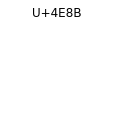

In [8]:
# テスト表示
for i in range(0, 4):
    print('学習データのラベル：', json_load[categories2list[Y[i]]])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = categories2list[Y[i]])
    plt.imshow(X_train[i], cmap='gray')

plt.show()

## データの形を整える

In [9]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)/255.
print('X_train.shape = {}'.format(X_train.shape))
print('Y_train.shape = {}'.format(Y_train.shape))

for i in range(5):
    print(Y_train[i])

from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, len(categories2list))

X_train.shape = (140424, 64, 64, 1)
Y_train.shape = (140424,)
589
1028
1436
2003
2795


# 深層学習を実行

In [10]:
import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [ ]:
#%%time  # コードの実行時間を測定するためのコードです
# モデルの訓練（エポック １０）
model.fit(X_train, Y_train,
          epochs=10,
        #   validation_data=(X_valid,Y_valid))        
          validation_data=(X_train,Y_train))

In [ ]:
model.evaluate(X_train, Y_train)

## 結果の確認

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train)

y_test = np.argmax(Y_train, axis=1)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import classification_report
print("Classification report for classifier %s:\n%s\n"
      % (model, classification_report(y_test, y_pred)))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,
            cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()